In [52]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/Datasets/stroke.csv')
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [53]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [54]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [55]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


to balance the dataset we use oversampling and undersampling

In [56]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
cols=['gender','ever_married','work_type','Residence_type','smoking_status']
for col in cols:
  df[col]=encoder.fit_transform(df[col])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [57]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [58]:
df['stroke'].value_counts()   # this id imbalanced dataset.... exist huge difference b/w classes

,count
stroke,
0,4861
1,249


# Oversampling

In [59]:
from imblearn.over_sampling import SMOTE  # Synthetic Minority Oversampling Technique
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler_os=MinMaxScaler()
X_scaled_os=scaler_os.fit_transform(X_os)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled_os,y_os,test_size=0.3,random_state=1)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_os=KNeighborsClassifier()
knn_os.fit(X_train,y_train)
y_pred=knn_os.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1453
           1       0.82      0.93      0.87      1464

    accuracy                           0.86      2917
   macro avg       0.87      0.86      0.86      2917
weighted avg       0.87      0.86      0.86      2917



86.25299965718204

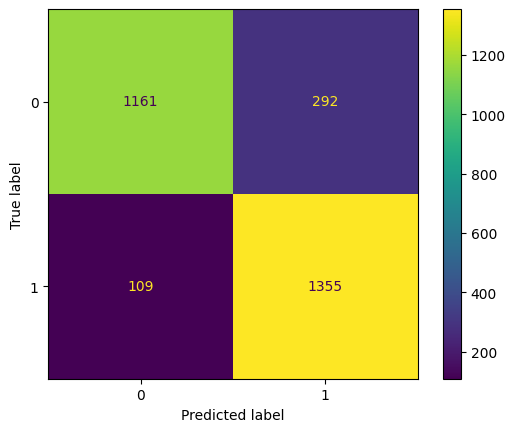

In [63]:
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)*100

# Undersampling

In [64]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler_us=MinMaxScaler()
X_scaled_us=scaler_us.fit_transform(X_us)

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled_us,y_us,test_size=0.3,random_state=1)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn_us=KNeighborsClassifier()
knn_us.fit(X_train,y_train)
y_pred=knn_us.predict(X_test)

              precision    recall  f1-score   support

           0       0.67      0.68      0.67        68
           1       0.73      0.72      0.72        82

    accuracy                           0.70       150
   macro avg       0.70      0.70      0.70       150
weighted avg       0.70      0.70      0.70       150



70.0

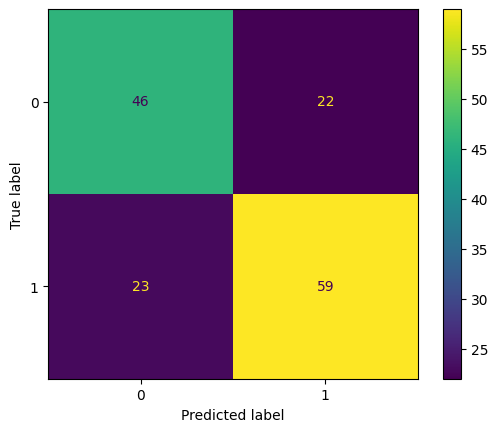

In [68]:
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)*100